# Projet numérique MAP432

BEN ABDALLAH Badiss, ECREPONT Gaëtan

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Question 1

On prend une marche aléatoire symétrique dans $\Gamma=\{0,N\}^2$ en partant de $X_0=x\in \Gamma$ et on considère le temps d'arrêt $T_{\partial \Gamma}=\inf_{n\geq 0}{\{X_n\in \partial \Gamma\}}$.

Alors $T_{\partial \Gamma}<\infty$ p.s. et on définit $$F(x) = \mathbb{E}_x[\phi(X_{T_{\partial \Gamma}})]$$

En découpant la trajectoire en fonction du premier pas qui est un voisin $y$ de $x$, on obtient $F(x) = \sum_{y\sim x}\mathbb{E}_x[\phi(X_{T_{\partial \Gamma}}) | X_1 = y]\mathbb{P}_x(X_1=y)=\sum_{y\sim x}\mathbb{E}_y[\phi(X_{T_{\partial \Gamma}})]\frac{1}{4}=\frac{1}{4}\sum_{y\sim x}F(y)$ de sorte que $\boxed{\overline{\Delta} F = 0}$ comme voulu, où $\overline{\Delta}$ dénote l'opérateur Laplacien discret : $\forall f\in\mathcal{F}(\mathbb{R}^2,\mathbb{R}), \overline{\Delta}f = \frac{1}{4(\Delta x)^2}\sum_{y\sim x}(f(y)-f(x))$.

De plus, il est clair que $\boxed{F=\phi}$ sur $\partial \Gamma$, donc $F$ vérifie les conditions limites voulues.

Il ne reste alors plus qu'à approximer $F(x)$ par une méthode de Monte Carlo : on génère des marches aléatoires dans $\Gamma$ qui partent de $x$ et retournent $\phi(X_{T_{\partial \Gamma}})$ dès que la marche atteint la bordure de $\Gamma$. 

Notre résolution approximée est caractérisée par le paramètre $n$ qui est la taille de la grille d'approximation de $F$ et $k$ qui est le nombre de marche aléatoires générées pour chaque $x$ pour calculer l'espérance empirique qui approche $F(x)$.

In [2]:
# les valeurs suivantes seront utilisées pour les simulations en Python (puis on les augmentera en passant à Java)
n = 100 # taille de la grille
k = 10 # nombre de marches aléatoires générées pour chaque point

In [3]:
def phi(x,y,n):
    """Conditions aux limites."""
    if (x==0 or x==n):
        return 0
    else: 
        return 1


def evolution1(x,y,n):
    """Marche aléatoire de la question 1."""
    while (x!=0 and x!=n and y!=0 and y!=n ):
        x+=(random.randint(0,1)*2-1)
        y+=(random.randint(0,1)*2-1)
    return phi(x,y,n)


def solution1(x,y,n,k):
    "Estimation de F(x,y) avec k simulations de marche aléatoire et sur une grille de paramètre n."
    return sum((evolution1(x,y,n) for i in range(k)))/k


def render(sol,n,k,gamma=None):
    """Plot de F sur [0,1]^2."""
    mesh_solution=np.empty(shape=(n+1,n+1))
    abs,ord=np.meshgrid(np.linspace(0,n,n+1),np.linspace(0,n,n+1))
    if not gamma is None:
        # on rajoute le paramètre gamma dans le cas de solution2 (cf. ce qui suit)
        sol_ = lambda i,j,n,k : sol(i,j,n,k,gamma)
    else:
        sol_ = sol
    for i in range(n+1): 
        for j in range(n+1):
            mesh_solution[i][j]=sol_(i,j,n,k)
    plt.colorbar(plt.imshow(mesh_solution, cmap='rainbow'))
    plt.show()

## Plot de $F$ sur $[0,1]^2$ $(\gamma=0)$

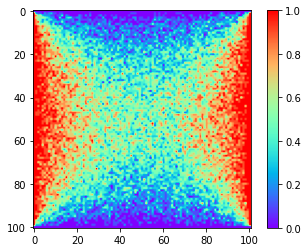

In [4]:
render(solution1,n,k)

# Question 2

On considère toujours une marche aléatoire dans $\Gamma=\{0,N\}^2$, mais on ajoute un état noté $\dagger$ de sorte à faire apparaître $\gamma$ comme un reste dans l'équation sur le Laplacien discret.


On considère donc une marche aléatoire symétrique dans $\Gamma$, avec une probabilité $\frac{1-\alpha}{4}$ d'aller vers n'importe quel des voisins de $x\in \Gamma$, et une probabilité $\alpha$ d'aller dans l'état $\dagger$, dont on ne ressort plus ensuite ($P(\dagger, \dagger)=1$). On considère logiquement le temps d'arrêt $T_{\dagger}=\inf_{n\geq 0}{\{X_n=\dagger\}}$.
On définit alors $$F(x)=\sum_{y\sim x}\mathbb{E}_x[\phi(X_{T_{\partial \Gamma}})\mathbb{1}_{T_{\partial \Gamma}<T_{\dagger}}]$$

Comme précedemment, on découpe la trajectoire en fonction du premier pas, mais on prend cette fois-ci en compte l'état $\dagger$, qui disparaît cependant des calculs car $\mathbb{E}_x[\phi(X_{T_{\partial \Gamma}})\mathbb{1}_{T_{\partial \Gamma}<T_{\dagger}}|X_1=\dagger]=0$ puisque $T_{\partial \Gamma}>T_{\dagger}$ dans ce cas.

On obtient donc $F(x) = \frac{1-\alpha}{4}\sum_{y\sim x}F(y)$ de sorte que $\alpha F(x) = \frac{1-\alpha}{4} \overline{\Delta} F(x)(\Delta x)^2$ i.e. $\boxed{\overline{\Delta} F - \gamma F = 0}$ où $\gamma = \frac{4\alpha(N+1)^2}{1-\alpha}$ puisque $\Delta x=\frac{1}{N+1}$.

On remarque par ailleurs que lorsque $\alpha$ décrit $]0,1[$, $\frac{4\alpha(N+1)^2}{1-\alpha}$ décrit $]0,+\infty[$ de sorte qu'on peut prendre n'importe quelle valeur $\gamma > 0$ et on aura une unique probabilité $\alpha$ correspondante.

Enfin, on a toujours $\boxed{F=\phi}$ sur $\partial \Gamma$.

Ainsi $F$ est la solution cherchée, et on peut à nouveau l'approximer par une méthode de Monte Carlo. On génère comme précédemment des marches aléatoires dans $\Gamma$ mais on rajoute la possibilité de passer dans l'état $\dagger$ avec une probabilité $\alpha=\frac{\gamma}{\gamma +4(N+1)^2}$. 

In [5]:
def evolution2(x,y,n,gamma):
    """Marche aléatoire de la question 1."""
    alpha = gamma / (gamma + 4*(n+1)**2)
    dague=False
    while (x!=0 and x!=n and y!=0 and y!=n and dague==False):
        test=random.uniform(0,1)
        if (test<alpha):
            dague=True
        else: 
            # si on est pas tombé dans l'état dague, on choisit de manière uniforme un des 4 voisins. 
            x+= (random.randint(0,1)*2-1)
            y+= (random.randint(0,1)*2-1)
            
    if dague: 
        return 0
    else: 
        return phi(x,y,n)
    
    
def solution2(x,y,n,k,alpha):
    """Plot de F sur [0,1]^2."""
    return sum((evolution2(x,y,n,alpha) for i in range(k)))/k

## Plot de $F$ sur $[0,1]^2$ $(\gamma=20)$

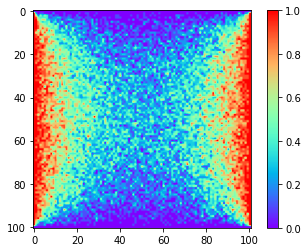

In [6]:
gamma = 20
render(solution2,n,k,gamma)

Comparé au plot précédent, on constate que la chaleur émanant des bords latéraux s'estompe plus rapidement : $\gamma$ semble ainsi jouer le rôle d'un terme de frottement, ce qui va dans le sens de l'intuition.

## Booster l'algo

Afin d'augmenter la qualité de l'approximation, nous avons transformé le code précédent en programme compilé (Java) pour qu'il tourne plus vite, ce qui nous a permis de prendre les paramètres $N=400$ et $k=30$ avec (seulement) quelques minutes de temps de calcul à chaque fois.

On transforme les données fournies par le code Java (stockées dans res.csv à chaque fois) et on les transforme en image PNG qu'on enregistre. Puis on affiche les images.

<code>X = pd.read_csv("res.csv", header=None) # 2D grid computed with Java program, stored as a 1D array for convenience
n = 400 # grid size
T = np.zeros((n+1,n+1))
// turning our 1D array X into a 2D array T
for i in range(n+1):
    for j in range(n+1):
        T[i][j] = X[(n+1)*i + j]      
// plotting T and saving the image
plt.colorbar(plt.imshow(T, cmap='rainbow'))
plt.title("n=400, gamma=gamma, k=30")
plt.savefig(f"java_{gamma}.png")
</code>

<div style="text-align:center">

<p style="text-align:center">𝛾 = 0</p>
<img src="res_java/java_0.png">

<p style="text-align:center">𝛾 = 1</p>
<img src="res_java/java_1.png">

<p style="text-align:center">𝛾 = 5</p>
<img src="res_java/java_5.png">

<p style="text-align:center">𝛾 = 10</p>
<img src="res_java/java_10.png">

<p style="text-align:center">𝛾 = 50</p>
<img src="res_java/java_50.png">

<p style="text-align:center">𝛾 = 100</p>
<img src="res_java/java_100.png">

</div>

## Commentaire

En conclusion, les résultats obtenus semblent cohérents : plus $\gamma$ augmente, plus la chaleur émanant des bords latéraux s'estompe rapidement. On peut donc bel et bien interpréter $\gamma$ comme un terme de frottement, dont l'effet devient clairement visible dès que $\gamma \gtrsim 10$. En outre, dès que $\gamma \gtrsim 100$, la chaleur s'estompe si rapidement que le froid est quasi omniprésent.